In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=3db7a759c5c4223588d910692fe3658d0dfc371ed3f86a52c360118b65de899d
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


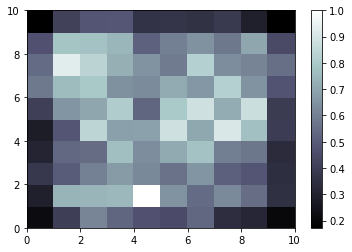

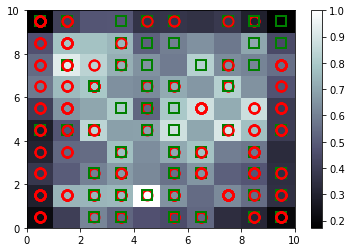

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
# Minisom library and module is used for performing Self Organizing Maps 
from minisom import MiniSom 

In [ ]:
# Loading Data 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit_Card_Applications.csv') 

# X  
data 

In [ ]:
# Shape of the data: 
data.shape 

In [ ]:
# Info of the data: 
data.info() 

In [ ]:
# Defining X variables for the input of SOM 
X = data.iloc[:, 1:14].values 
y = data.iloc[:, -1].values 

# X variables: 
pd.DataFrame(X) 

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

sc = MinMaxScaler(feature_range = (0, 1)) 
X = sc.fit_transform(X) 
pd.DataFrame(X) 

In [ ]:
# Set the hyper parameters 
som_grid_rows = 10 
som_grid_columns = 10 
iterations = 20000 
sigma = 1 
learning_rate = 0.5 

# define SOM: 
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate) 

# Initializing the weights 
som.random_weights_init(X) 

# Training 
som.train_random(X, iterations) 
 
# Returns the distance map from the weights: 
som.distance_map() 

In [ ]:
from pylab import plot, axis, show, pcolor, colorbar, bone 

bone() 
pcolor(som.distance_map().T)       # Distance map as background 
colorbar() 
show() 
bone() 
pcolor(som.distance_map().T) 
colorbar() #gives legend 

markers = ['o', 's']                 # if the observation is fraud then red circular color or else green square 
colors = ['r', 'g'] 

for i, x in enumerate(X): 
    w = som.winner(x) 
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 2) 

show() 

In [ ]:
mappings = som.win_map(X) 
mappings 
mappings.keys() 
len(mappings.keys()) 

mappings[(9,8)] 
frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0) 
frauds 

# the list of customers who are frauds: 
frauds1 = sc.inverse_transform(frauds) 
pd.DataFrame(frauds1) 

0      1       2    3     4    5      6    7    8     9    10   11  \
0   0.0  28.17   0.585  2.0   6.0  4.0  0.040  0.0  0.0   0.0  0.0  2.0   
1   0.0  37.33   2.500  2.0   3.0  8.0  0.210  0.0  0.0   0.0  0.0  2.0   
2   0.0  40.83   3.500  2.0   3.0  5.0  0.500  0.0  0.0   0.0  0.0  1.0   
3   0.0  18.58  10.000  2.0   2.0  4.0  0.415  0.0  0.0   0.0  0.0  2.0   
4   0.0  38.92   1.665  2.0   6.0  4.0  0.250  0.0  0.0   0.0  0.0  2.0   
5   0.0  39.08   4.000  2.0   8.0  4.0  3.000  0.0  0.0   0.0  0.0  2.0   
6   0.0  38.33   4.415  2.0   8.0  4.0  0.125  0.0  0.0   0.0  0.0  2.0   
7   0.0  19.17   5.415  2.0   3.0  8.0  0.290  0.0  0.0   0.0  0.0  2.0   
8   0.0  25.58   0.000  2.0   8.0  4.0  0.000  0.0  0.0   0.0  0.0  3.0   
9   0.0  32.00   6.000  2.0   2.0  4.0  1.250  0.0  0.0   0.0  0.0  2.0   
10  0.0  16.33   0.210  2.0   6.0  4.0  0.125  0.0  0.0   0.0  0.0  2.0   
11  0.0  71.58   0.000  2.0   8.0  4.0  0.000  0.0  0.0   0.0  0.0  3.0   
12  0.0  21.92  11.665  2.0   4.0  8.0  0.085  0.0  0.0   0.0  0.0  2.0   
13  0.0  22.67   0.790  2.0   3.0  4.0  0.085  0.0  0.0   0.0  0.0  2.0   
14  0.0  41.58   1.040  2.0   6.0  4.0  0.665  0.0  0.0   0.0  0.0  2.0   
15  0.0  52.50   7.000  2.0   6.0  8.0  3.000  0.0  0.0   0.0  0.0  2.0   
16  0.0  20.75   9.540  2.0   3.0  4.0  0.040  0.0  0.0   0.0  0.0  2.0   
17  0.0  22.75   6.165  2.0   6.0  4.0  0.165  0.0  0.0   0.0  0.0  2.0   
18  0.0  48.17   1.335  2.0   3.0  7.0  0.335  0.0  0.0   0.0  0.0  2.0   
19  0.0  22.42   5.665  2.0  11.0  4.0  2.585  1.0  1.0   7.0  0.0  2.0   
20  0.0  30.67  12.000  2.0   8.0  4.0  2.000  1.0  1.0   1.0  0.0  2.0   
21  0.0  32.17   1.460  2.0   9.0  4.0  1.085  1.0  1.0  16.0  0.0  2.0   
22  0.0  20.42   0.835  2.0  11.0  4.0  1.585  1.0  1.0   1.0  0.0  2.0   
23  0.0  18.75   7.500  2.0  11.0  4.0  2.710  1.0  1.0   5.0  0.0  2.0   
24  0.0  20.67   3.000  2.0  11.0  4.0  0.165  1.0  1.0   3.0  0.0  2.0   
25  0.0  24.50  12.750  2.0   8.0  5.0  4.750  1.0  1.0   2.0  0.0  2.0   
26  0.0  36.00   1.000  2.0   8.0  4.0  2.000  1.0  1.0  11.0  0.0  2.0   
27  0.0  28.17   0.375  2.0  11.0  4.0  0.585  1.0  1.0   4.0  0.0  2.0   
28  0.0  22.50   8.500  2.0  11.0  4.0  1.750  1.0  1.0  10.0  0.0  2.0   
29  0.0  20.67   1.835  2.0  11.0  4.0  2.085  1.0  1.0   5.0  0.0  2.0   
30  0.0  25.42   1.125  2.0  11.0  4.0  1.290  1.0  1.0   2.0  0.0  2.0   
31  0.0  18.42   9.250  2.0  11.0  4.0  1.210  1.0  1.0   4.0  0.0  2.0   
32  0.0  23.25   5.875  2.0  11.0  4.0  3.170  1.0  1.0  10.0  0.0  2.0   

        12  
0    260.0  
1    260.0  
2   1160.0  
3     80.0  
4      0.0  
5    480.0  
6    160.0  
7     80.0  
8    184.0  
9    272.0  
10   200.0  
11   184.0  
12   320.0  
13   144.0  
14   240.0  
15     0.0  
16   200.0  
17   220.0  
18     0.0  
19   129.0  
20   220.0  
21   120.0  
22     0.0  
23   184.0  
24   100.0  
25    73.0  
26     0.0  
27    80.0  
28    80.0  
29   220.0  
30   200.0  
31    60.0  
32   120.0